In [1]:
import numpy as np
np.random.seed(123)  # for reproducibility

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from matplotlib import pyplot as plt
from imageio import imread # Need 'Imageio' 'Pillow' packages
import cv2

from math import floor, ceil
import os

Using TensorFlow backend.


## Load data from German traffic sign database

In [2]:
main_folder_path = "./German traffic sign dataset/GTSRB_Training"

csv_content = [] # One numpy array per folder
                 # Each numpy array x: image y: proprierties

# Iterate over all subfolders
for i in range(43):
    train_dataset_path = main_folder_path + '/' + "{:05.0f}".format(i) + '/'
    # Retrieve complete list of names from the csv files
    f_name = train_dataset_path + "GT-" + "{:05.0f}".format(i) + ".csv"
    csv_content.append(np.genfromtxt(f_name, delimiter=';', skip_header=1, dtype=str))

In [3]:
print(csv_content[0][1,:])

['00000_00001.ppm' '30' '30' '5' '5' '25' '25' '0']


In [44]:
# Load the images with read names

image = []
y_train = np.empty(0)

for i in range(43):
    image_data = []
    train_dataset_path = main_folder_path + '/' + "{:05.0f}".format(i) + '/'
    for image_name in enumerate(csv_content[i][:,0]):
        image_data.append(imread(train_dataset_path + image_name[1])[:,:,0])
        y_train = np.append(y_train, i)
    image.append(image_data)

[ 0.  0.  0. ... 42. 42. 42.]


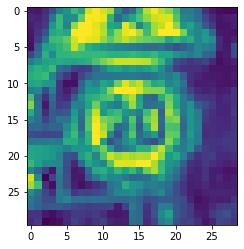

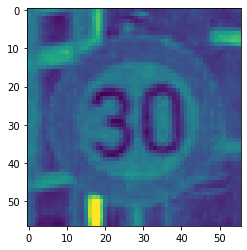

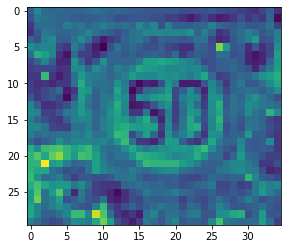

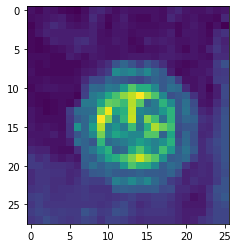

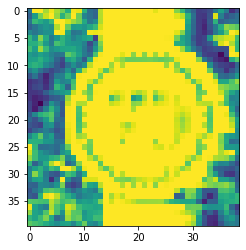

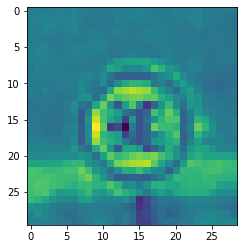

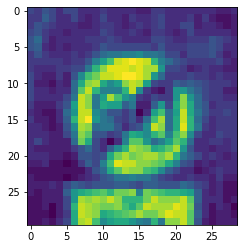

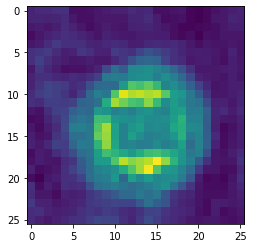

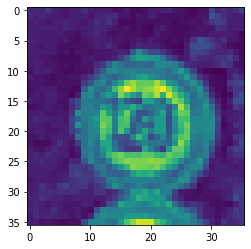

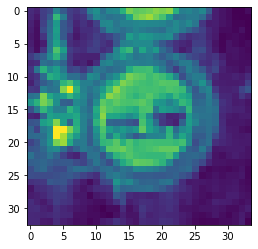

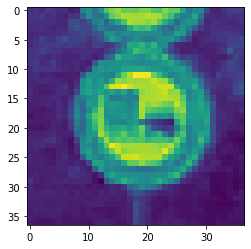

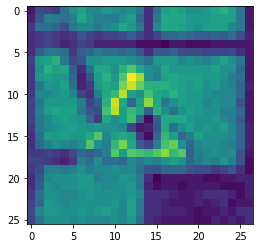

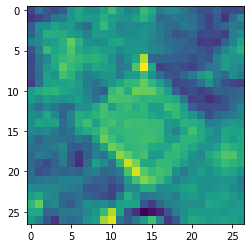

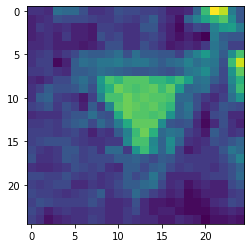

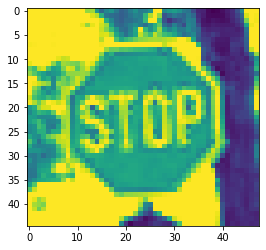

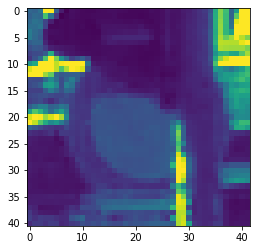

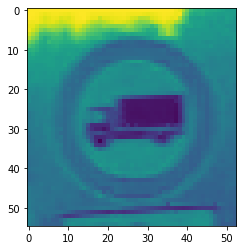

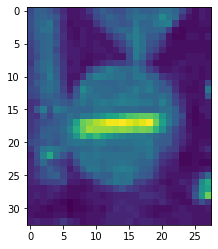

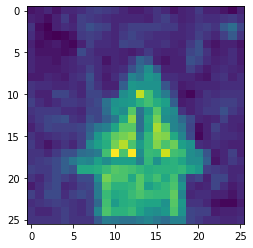

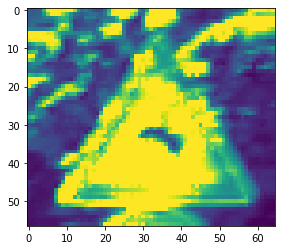

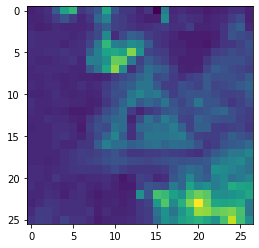

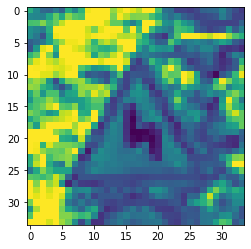

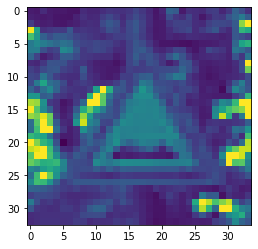

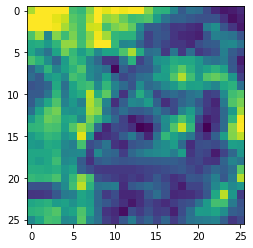

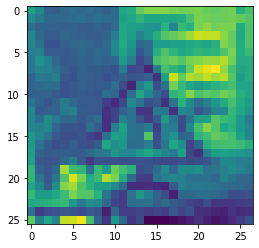

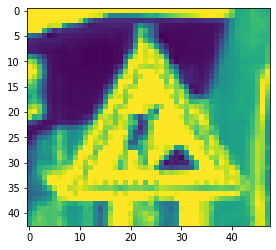

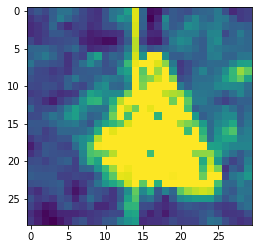

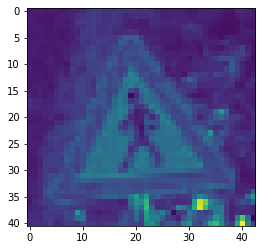

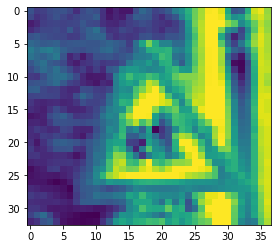

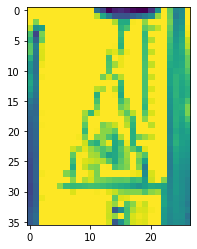

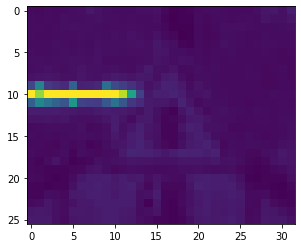

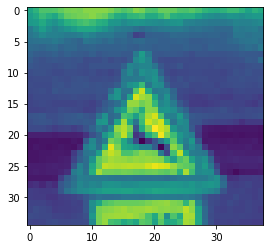

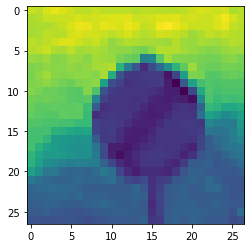

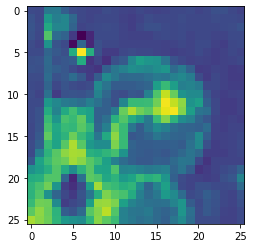

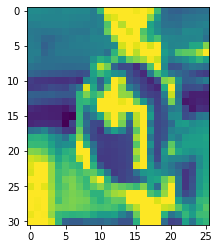

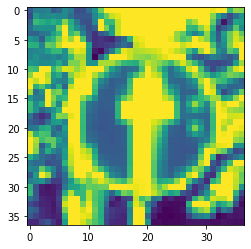

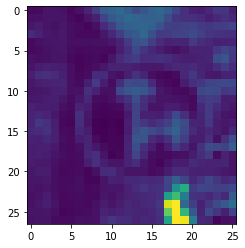

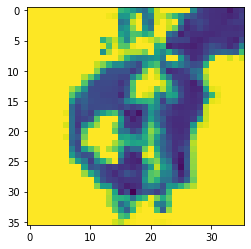

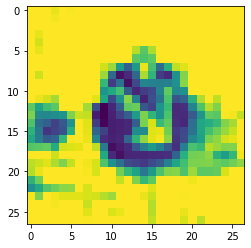

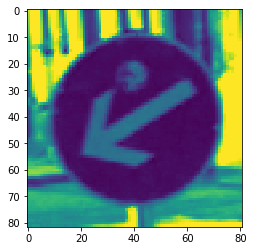

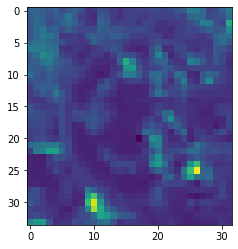

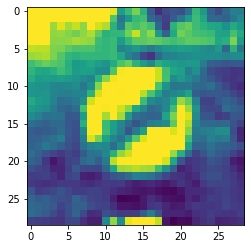

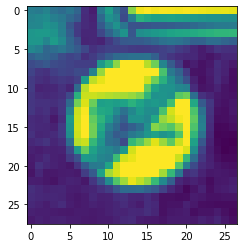

In [14]:
# Print the first image in every class
for i in image:
    plt.imshow(i[0])
    plt.show()

In [21]:
# Count total number of images:
img_classes = []
for i in image:
    img_classes.append(len(i))
img_num = sum(img_classes)

39209


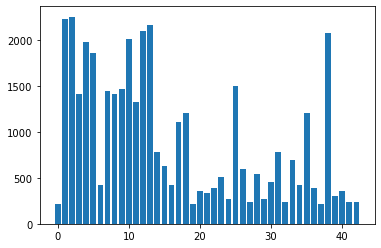

<function matplotlib.pyplot.show(*args, **kw)>

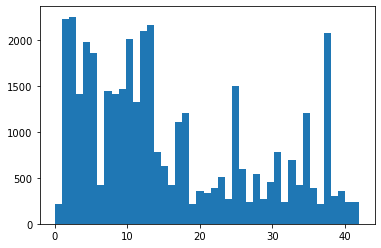

In [45]:
# Histogram of class population
plt.bar(np.arange(len(image)), img_classes)
plt.show()
plt.hist(y_train, len(image))
plt.show

In [35]:
# Reshape training set
x_size = 32
y_size = 32
img_train = np.empty((img_num, x_size, y_size))

elaborated = 0

for image_set in enumerate(image):
    for image_array in enumerate(image_set[1]):
        # Cutting the image to match the content
        x2 = int(csv_content[image_set[0]][image_array[0], 5]) 
        x1 = int(csv_content[image_set[0]][image_array[0], 3])
        y2 = int(csv_content[image_set[0]][image_array[0], 6]) 
        y1 = int(csv_content[image_set[0]][image_array[0], 4])
        size = max(x2-x1, y2-y1)
        # Padding to have square images
        padded = np.pad(np.asarray(image_array[1][x1:x2, y1:y2]), \
                        ((floor((size-x2+x1)/2), ceil((size-x2+x1)/2)),\
                         (floor((size-y2+y1)/2), ceil((size-y2+y1)/2))))
        # Reshaping the image to match the selected dimension
        reshaped = cv2.resize(padded, (x_size, y_size), interpolation = cv2.INTER_AREA)
        # Copying the image inside the output array
        np.copyto(img_train[elaborated,:,:], reshaped)
        # Showing result
        #plt.imshow(img_train[elaborated,:,:])
        #plt.show()
        #Images should be one after another to train the model
        elaborated += 1

In [49]:
# Reshaping the train data to have a correct fit input
print(img_train.shape)
img_train_rsh = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], img_train.shape[2],1))
print(img_train_rsh.shape)

(39209, 32, 32, 1)
(39209, 32, 32, 1)


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [50]:
# Prepare ground truth for classification
print(y_train.shape)
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = to_categorical(y_train, len(image))
print(Y_train.shape)

(39209,)
(39209, 43)


In [54]:
model = Sequential()
model.add(Conv2D(32, 3, strides=(1,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [55]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(img_train_rsh, Y_train, batch_size=500, epochs=5, verbose=1)

Epoch 1/5
39209/39209 [==============================] - 12s 304us/step - loss: 19.0276 - accuracy: 0.0651
Epoch 2/5
39209/39209 [==============================] - 12s 306us/step - loss: 3.3992 - accuracy: 0.1361
Epoch 3/5
39209/39209 [==============================] - 12s 304us/step - loss: 2.9975 - accuracy: 0.2148
Epoch 4/5
39209/39209 [==============================] - 12s 301us/step - loss: 2.5506 - accuracy: 0.3266
Epoch 5/5
39209/39209 [==============================] - 12s 301us/step - loss: 2.1347 - accuracy: 0.4566


In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

print('\nTest accuracy:', test_acc)